In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

targz2zipfromsimpson
the-simpsons-characters-dataset



In [2]:
!ls ../input/the-simpsons-characters-dataset/

annotation.txt		     kaggle_simpson_testset  simpsons_dataset.tar.gz
characters_illustration.png  number_pic_char.csv     weights.best.hdf5


In [3]:
!ls ../input/targz2zipfromsimpson/

train


In [4]:
# ref:
# http://nbviewer.jupyter.org/github/erhwenkuo/deep-learning-with-keras-notebooks/blob/master/2.2-simpson-characters-recognition.ipynb

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import h5py
import glob
import time
from random import shuffle
from collections import Counter

from sklearn.model_selection import train_test_split

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


In [6]:
!ls ../input/targz2zipfromsimpson/train/train/

abraham_grampa_simpson	  groundskeeper_willie	ned_flanders
agnes_skinner		  homer_simpson		nelson_muntz
apu_nahasapeemapetilon	  kent_brockman		otto_mann
barney_gumble		  krusty_the_clown	patty_bouvier
bart_simpson		  lenny_leonard		principal_skinner
carl_carlson		  lionel_hutz		professor_john_frink
charles_montgomery_burns  lisa_simpson		rainier_wolfcastle
chief_wiggum		  maggie_simpson	ralph_wiggum
cletus_spuckler		  marge_simpson		selma_bouvier
comic_book_guy		  martin_prince		sideshow_bob
disco_stu		  mayor_quimby		sideshow_mel
edna_krabappel		  milhouse_van_houten	snake_jailbird
fat_tony		  miss_hoover		troy_mcclure
gil			  moe_szyslak		waylon_smithers


In [7]:
map_characters = {0:'abraham_grampa_simpson', 1:'groundskeeper_willie', 2:'ned_flanders', 3:'agnes_skinner', 4:'homer_simpson', 5:'nelson_muntz', 6:'apu_nahasapeemapetilon', 7:'kent_brockman', 8:'otto_mann', 9:'barney_gumble', 10:'krusty_the_clown', 11:'patty_bouvier', 12:'bart_simpson', 13:'lenny_leonard', 14:'principal_skinner', 15:'carl_carlson', 16:'lionel_hutz', 17:'professor_john_frink', 18:'charles_montgomery_burns', 19:'lisa_simpson', 20:'rainier_wolfcastle', 21:'chief_wiggum', 22:'maggie_simpson', 23:'ralph_wiggum', 24:'cletus_spuckler', 25:'marge_simpson', 26:'selma_bouvier',27:'comic_book_guy', 28:'martin_prince', 29:'sideshow_bob', 30:'disco_stu', 31:'mayor_quimby', 32:'sideshow_mel', 33:'edna_krabappel', 34:'milhouse_van_houten', 35:'snake_jailbird', 36:'fat_tony', 37:'miss_hoover', 38:'troy_mcclure', 39:'gil', 40:'moe_szyslak', 41:'waylon_smithers'}

img_width = 42 
img_height = 42

num_classes = len(map_characters)
test_size = 0.15

imgsPath = "../input/targz2zipfromsimpson/train/train/"

In [8]:
def load_pictures():
    pics = []
    labels = []
    
    for k, v in map_characters.items():
        pictures = [k for k in glob.glob(imgsPath + "/" + v + "/*")]        
        print(v + " : " + str(len(pictures)))
        for i, pic in enumerate(pictures):
            tmp_img = cv2.imread(pic)
            tmp_img = cv2.cvtColor(tmp_img, cv2.COLOR_BGR2RGB)
            tmp_img = cv2.resize(tmp_img, (img_height, img_width))     
            pics.append(tmp_img)
            labels.append(k)    
    return np.array(pics), np.array(labels)

def get_dataset():
    X, y = load_pictures()
    # one hot encoding
    y = keras.utils.to_categorical(y, num_classes)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) 
    # normalization
    X_train = X_train.astype('float32') / 255.
    X_test = X_test.astype('float32') / 255.
    print("Train", X_train.shape, y_train.shape)
    print("Test", X_test.shape, y_test.shape)
    
    return X_train, X_test, y_train, y_test   

In [9]:
X_train, X_test, y_train, y_test = get_dataset()

abraham_grampa_simpson : 913
groundskeeper_willie : 121
ned_flanders : 1454
agnes_skinner : 42
homer_simpson : 2246
nelson_muntz : 358
apu_nahasapeemapetilon : 623
kent_brockman : 498
otto_mann : 32
barney_gumble : 106
krusty_the_clown : 1206
patty_bouvier : 72
bart_simpson : 1342
lenny_leonard : 310
principal_skinner : 1194
carl_carlson : 98
lionel_hutz : 3
professor_john_frink : 65
charles_montgomery_burns : 1193
lisa_simpson : 1354
rainier_wolfcastle : 45
chief_wiggum : 986
maggie_simpson : 128
ralph_wiggum : 89
cletus_spuckler : 47
marge_simpson : 1291
selma_bouvier : 103
comic_book_guy : 469
martin_prince : 71
sideshow_bob : 877
disco_stu : 8
mayor_quimby : 246
sideshow_mel : 40
edna_krabappel : 457
milhouse_van_houten : 1079
snake_jailbird : 55
fat_tony : 27
miss_hoover : 17
troy_mcclure : 8
gil : 27
moe_szyslak : 1452
waylon_smithers : 181
Train (17793, 42, 42, 3) (17793, 42)
Test (3140, 42, 42, 3) (3140, 42)


In [10]:
map_characters = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson', 
        3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
        7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson', 
        11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak', 
        14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'}

num_classes = len(map_characters)

X_train, X_test, y_train, y_test = get_dataset()

abraham_grampa_simpson : 913
apu_nahasapeemapetilon : 623
bart_simpson : 1342
charles_montgomery_burns : 1193
chief_wiggum : 986
comic_book_guy : 469
edna_krabappel : 457
homer_simpson : 2246
kent_brockman : 498
krusty_the_clown : 1206
lisa_simpson : 1354
marge_simpson : 1291
milhouse_van_houten : 1079
moe_szyslak : 1452
ned_flanders : 1454
nelson_muntz : 358
principal_skinner : 1194
sideshow_bob : 877
Train (16143, 42, 42, 3) (16143, 18)
Test (2849, 42, 42, 3) (2849, 18)


In [66]:
def create_model_six_conv(input_shape):
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(units=1024, activation='relu'))
    model.add(Dropout(0.5))
    # output
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

model = create_model_six_conv((img_height, img_width, 3))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 42, 42, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 40, 40, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 18, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 9, 9, 64)          0         
__________

In [12]:
lr = 0.01
sgd = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])

In [13]:
def lr_schedule(epoch):
    return lr*(0.1**int(epoch/10))

batch_size = 32
epochs = 20 #30 takes too much time

history = model.fit(X_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         validation_data=(X_test, y_test),
         shuffle=True,
         callbacks=[LearningRateScheduler(lr_schedule),
             ModelCheckpoint('model.h5', save_best_only=True)
         ])

Train on 16143 samples, validate on 2849 samples
Epoch 1/20
16143/16143 [==============================] - 206s 13ms/step - loss: 2.5680 - acc: 0.2004 - val_loss: 2.0352 - val_acc: 0.3840
Epoch 2/20
16143/16143 [==============================] - 208s 13ms/step - loss: 1.7810 - acc: 0.4491 - val_loss: 1.3975 - val_acc: 0.5816
Epoch 3/20
16143/16143 [==============================] - 210s 13ms/step - loss: 1.3050 - acc: 0.6009 - val_loss: 1.2231 - val_acc: 0.6276
Epoch 4/20
16143/16143 [==============================] - 218s 13ms/step - loss: 1.0261 - acc: 0.6874 - val_loss: 0.9011 - val_acc: 0.7231
Epoch 5/20
16143/16143 [==============================] - 210s 13ms/step - loss: 0.8417 - acc: 0.7416 - val_loss: 0.7367 - val_acc: 0.7792
Epoch 6/20
16143/16143 [==============================] - 206s 13ms/step - loss: 0.7208 - acc: 0.7840 - val_loss: 0.6886 - val_acc: 0.7929
Epoch 7/20
16143/16143 [==============================] - 205s 13ms/step - loss: 0.6357 - acc: 0.8064 - val_loss: 0.6

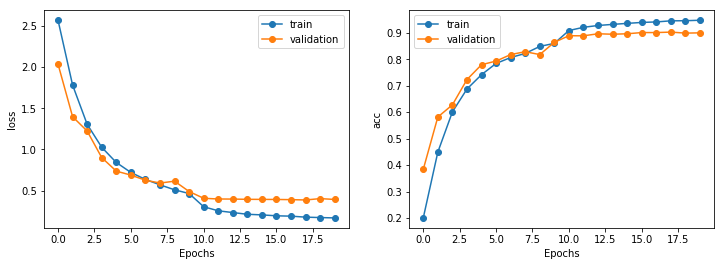

In [14]:
import matplotlib.pyplot as plt

def plot_train_history(history, train_metrics, val_metrics):
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    
    
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history, 'loss','val_loss')

plt.subplot(1,2,2)
plot_train_history(history, 'acc','val_acc')

plt.show()

In [15]:
import os
from pathlib import PurePath 

def load_test_set(path):
    pics, labels = [], []
    reverse_dict = {v:k for k,v in map_characters.items()}
    for pic in glob.glob(path+'*.*'):
        char_name = "_".join(os.path.basename(pic).split('_')[:-1])
        if char_name in reverse_dict:
            temp = cv2.imread(pic)
            temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
            temp = cv2.resize(temp, (img_height,img_width)).astype('float32') / 255.
            pics.append(temp)
            labels.append(reverse_dict[char_name])
    X_test = np.array(pics)
    y_test = np.array(labels)
    # one hot encoding
    y_test = keras.utils.to_categorical(y_test, num_classes)
    print("Test set", X_test.shape, y_test.shape)
    return X_test, y_test

In [16]:
!ls ../input/the-simpsons-characters-dataset/kaggle_simpson_testset

abraham_grampa_simpson_0.jpg	 lenny_leonard_0.jpg
abraham_grampa_simpson_1.jpg	 lenny_leonard_1.jpg
abraham_grampa_simpson_10.jpg	 lenny_leonard_10.jpg
abraham_grampa_simpson_11.jpg	 lenny_leonard_11.jpg
abraham_grampa_simpson_12.jpg	 lenny_leonard_12.jpg
abraham_grampa_simpson_13.jpg	 lenny_leonard_13.jpg
abraham_grampa_simpson_14.jpg	 lenny_leonard_14.jpg
abraham_grampa_simpson_15.jpg	 lenny_leonard_15.jpg
abraham_grampa_simpson_16.jpg	 lenny_leonard_16.jpg
abraham_grampa_simpson_17.jpg	 lenny_leonard_17.jpg
abraham_grampa_simpson_18.jpg	 lenny_leonard_18.jpg
abraham_grampa_simpson_19.jpg	 lenny_leonard_19.jpg
abraham_grampa_simpson_2.jpg	 lenny_leonard_2.jpg
abraham_grampa_simpson_20.jpg	 lenny_leonard_20.jpg
abraham_grampa_simpson_21.jpg	 lenny_leonard_21.jpg
abraham_grampa_simpson_22.jpg	 lenny_leonard_22.jpg
abraham_grampa_simpson_23.jpg	 lenny_leonard_23.jpg
abraham_grampa_simpson_24.jpg	 lenny_leonard_24.jpg
abraham_grampa_simpson_25.jpg	 lenny_leonard_25.jpg
abraham_grampa_sim

In [17]:
imgsPath = "../input/the-simpsons-characters-dataset/kaggle_simpson_testset/"

X_valtest, y_valtest = load_test_set(imgsPath)

Test set (890, 42, 42, 3) (890, 18)


In [30]:
from keras.models import load_model

model = load_model('model.h5')

y_pred = model.predict_classes(X_valtest)
acc = np.sum(y_pred==np.argmax(y_valtest, axis=1))/np.size(y_pred)
print("Test accuracy = {}".format(acc))

Test accuracy = 0.9640449438202248


In [24]:
import sklearn

y_pred = model.predict(X_test)
print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], 
                                                  np.argmax(y_pred, axis=1), 
                                                  target_names=list(map_characters.values())), sep='')


                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.92      0.87      0.89       136
  apu_nahasapeemapetilon       0.93      0.94      0.94        86
            bart_simpson       0.88      0.81      0.85       214
charles_montgomery_burns       0.85      0.80      0.82       200
            chief_wiggum       0.91      0.92      0.92       153
          comic_book_guy       0.90      0.83      0.86        75
          edna_krabappel       0.85      0.85      0.85        55
           homer_simpson       0.88      0.92      0.90       319
           kent_brockman       0.87      0.92      0.89        63
        krusty_the_clown       0.93      0.96      0.95       175
            lisa_simpson       0.87      0.89      0.88       223
           marge_simpson       0.93      0.96      0.95       173
     milhouse_van_houten       0.94      0.94      0.94       154
             moe_szyslak       0.85      0.91      0.88       207
        